# Predict Future Sales

The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [4]:
train = pd.read_csv('data/sales_train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

In [7]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
train['date'] = pd.to_datetime(train['date'])

Adding items names and categories from other csv to the train data

In [12]:
items = pd.read_csv('data/items.csv')
categories = pd.read_csv('data/item_categories.csv')
items.shape, categories.shape

((22170, 3), (84, 2))

In [16]:
items_cat = items.merge(categories, on='item_category_id')
items_cat.head()

(22170, 4)

In [18]:
train = train.merge(items_cat, on='item_id')
#test = test.merge(items_cat, on='item_id')

In [22]:
train.shape

(2935849, 9)

In [20]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-02-01,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-03-01,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


We have to predict sales for November, so we need to arrange them by months

In [67]:
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['year-month'] = train['year'].astype(str) +'-' +train['month'].astype(str)

In [68]:
train['year-month'].head()

0    2013-2
1    2013-1
2    2013-1
3    2013-2
4    2013-3
Name: year-month, dtype: object

In [69]:
by_month = train.groupby('year-month')

In [74]:
total_sales_by_month = by_month['item_cnt_day'].sum()

In [75]:
total_sales_by_month.head()

year-month
2013-1     116950.0
2013-10    119723.0
2013-11    117422.0
2013-12    184559.0
2013-2     133607.0
Name: item_cnt_day, dtype: float64

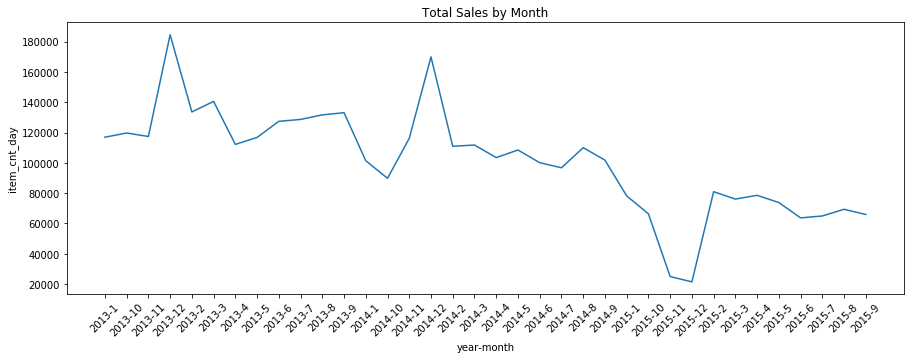

In [87]:
plt.figure(figsize=(15,5))
sns.lineplot(x=total_sales_by_month.index, y=total_sales_by_month);
plt.title('Total Sales by Month')
plt.xticks(rotation=45);

### Exploratory data analysis

In [28]:
train.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False)

item_id
20949    187642.0
2808      17245.0
3732      16642.0
17717     15830.0
5822      14515.0
           ...   
13477         0.0
18062        -1.0
11871        -1.0
13474        -1.0
1590        -11.0
Name: item_cnt_day, Length: 21807, dtype: float64

most saled item: 20949

C:\Users\aceor\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


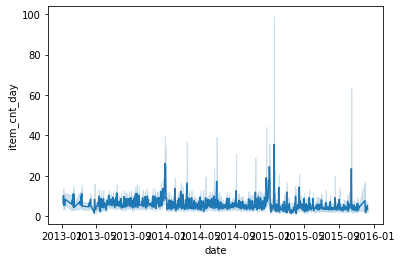

In [32]:
most_saled = train[train['item_id'] == 20949]
sns.lineplot(x='date', y='item_cnt_day', data=most_saled);

Dataset has 8 features